<a href="https://colab.research.google.com/github/linegrunwald/QuarentenaDadosAlura/blob/master/Aula3/QuarentenaDadosIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 3

# Introdução

Olá, seja bem-vinda e bem-vindo ao notebook da **aula 03**! A partir desta aula iremos analisar e discutir uma base de dados junto com você. Por isso, será **importante que as discussões nos vídeos sejam acompanhadas** para entender todos os processos das análises.



Nessa aula utilizaremos uma base totalmente nova, que nós também não conhecíamos até o momento da análise. Você vai acompanhar a exploração e, principalmente, as dificuldades ao analisar uma base de dados desconhecida.

Vamos começar importando a nossa base de dados! Nessa aula iremos trabalhar com a IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados [IMBD](https://www.imdb.com/).

In [164]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/linegrunwald/4b3daef3a8f55216b01cc7a767ee5d68/raw/ed06dc6a1ca6cf338ce8dd839c228b765e71114e/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Como você acompanhou, iniciamos a aula tentando conhecer as diversas colunas de cada filme e uma das que chamou mais a atenção foi a color. Vamos conhecer quais valores temos nesta colunas?!

In [165]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

Verificamos que essa coluna **color** informa se o filme é colorido ou é preto e branco. Vamos descobrir agora quantos filmes de cada tipo nós temos:

In [166]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [167]:
#porcentagem coloca variavel normalize 
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

Agora já descobrimos quantos filmes coloridos e preto e branco temos, e também sabemos que há mais de 5000 filmes na base. Fizemos algo novo, que foi chamar o `value_counts()`, passando o parâmetro **normalize como True**. Desse modo, já calculamos qual é a participação de cada um dos tipos de filmes (**95% são filmes coloridos**).

Excelente! Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados (**lembrando que nossa base é uma amostra muito pequena da realidade**)

In [168]:
imdb["director_name"].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
Zack Ward            1
Carmen Marron        1
Marc Schölermann     1
Rob McKittrick       1
Ray Griggs           1
Name: director_name, Length: 2398, dtype: int64

**Steven Spielberg e Woody Allen** são os diretores com mais filmes no **IMDB 5000**.

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [169]:
imdb[["movie_title","num_critic_for_reviews"]]

,movie_title,num_critic_for_reviews
0,Avatar,723.0
1,Pirates of the Caribbean: At World's End,302.0
2,Spectre,602.0
3,The Dark Knight Rises,813.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...
5038,Signed Sealed Delivered,1.0
5039,The Following,43.0
5040,A Plague So Pleasant,13.0
5041,Shanghai Calling,14.0


In [170]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

Veja que as colunas **color** e **director_name** são *strings*, não fazendo sentido olhar para médias, medianas e afins. Olhar para o número de avaliações já pode ser interessante, por isso usamos o `.describe()`.

Agora podemos até plotar um histograma para avaliar o número de review.

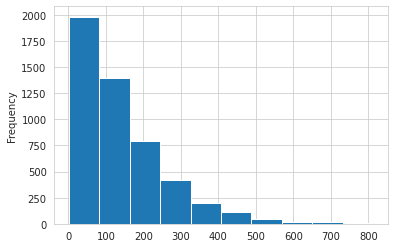

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

Verificamos que poucos filmes tem mais de 500 votos, por isso um paralelo que podemos fazer é que filmes com muitos votos são mais populares e filmes com poucos votos não são tão populares. Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

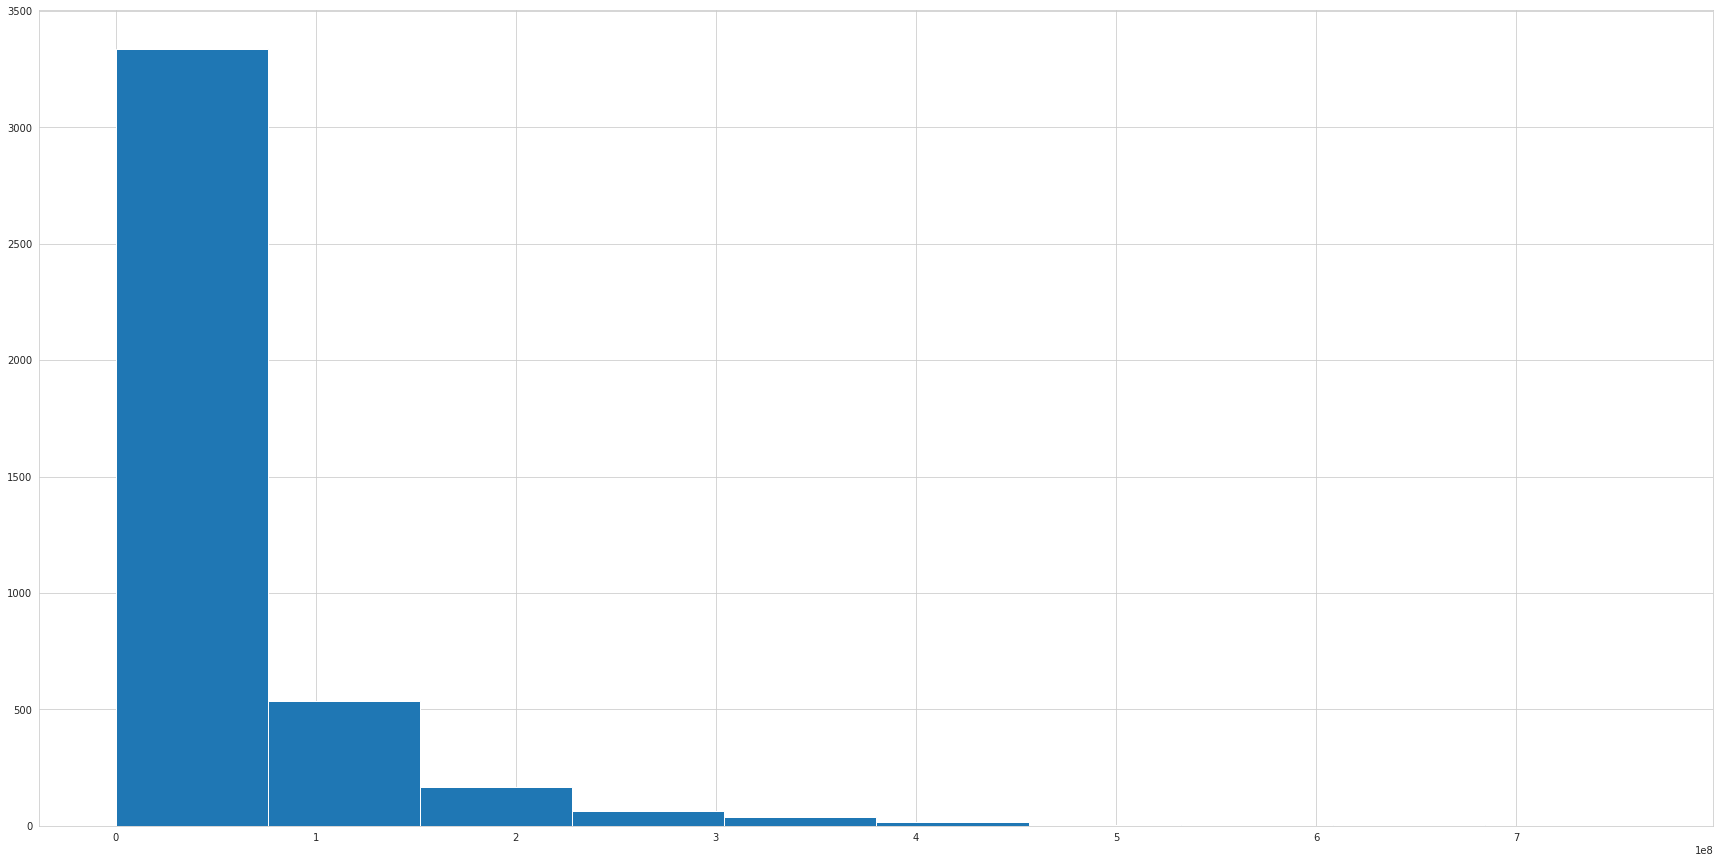

4159

In [172]:
plt.figure(figsize=(30,15))
imdb.gross.hist()
plt.show()
imdb["gross"].count()

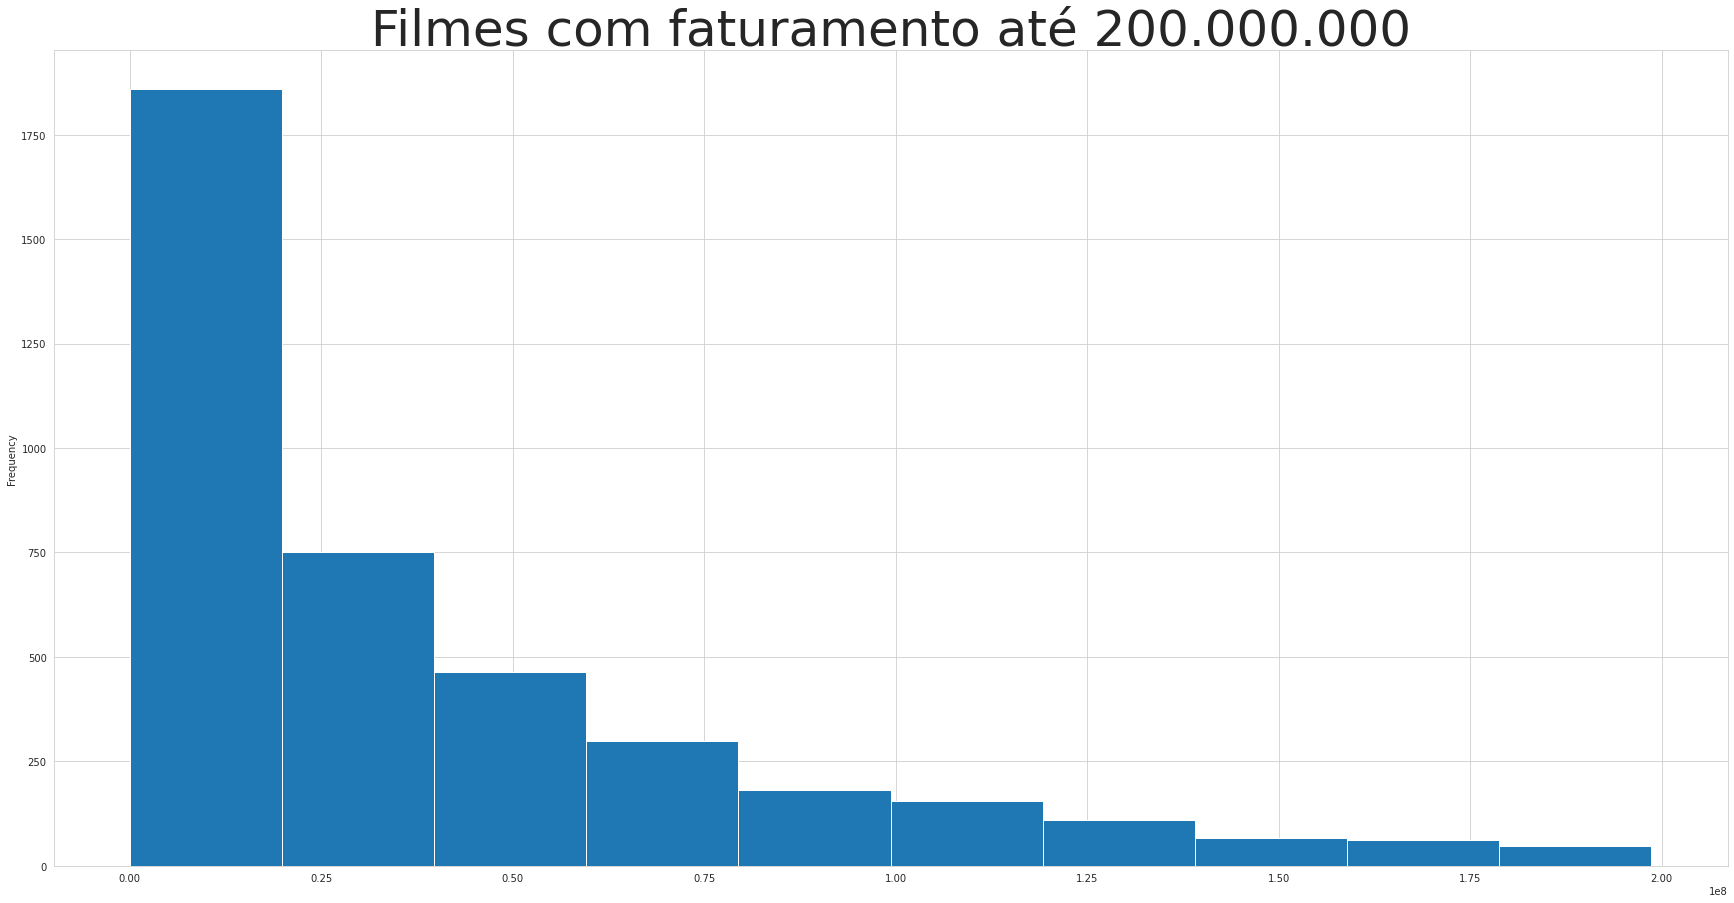

3992


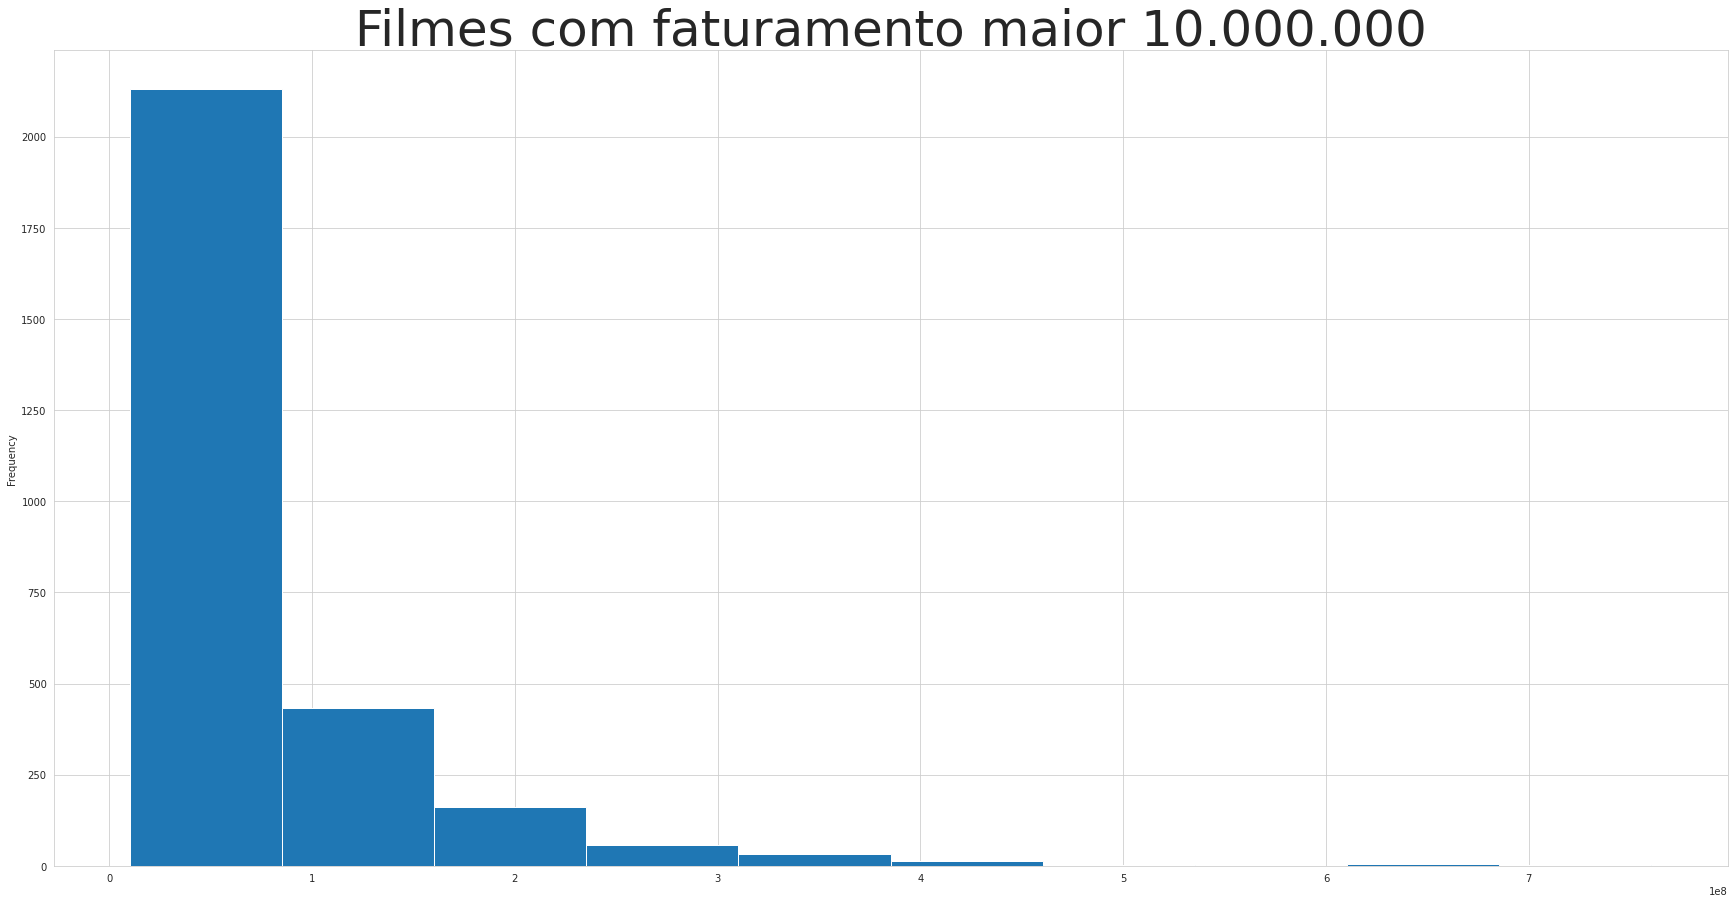

2836


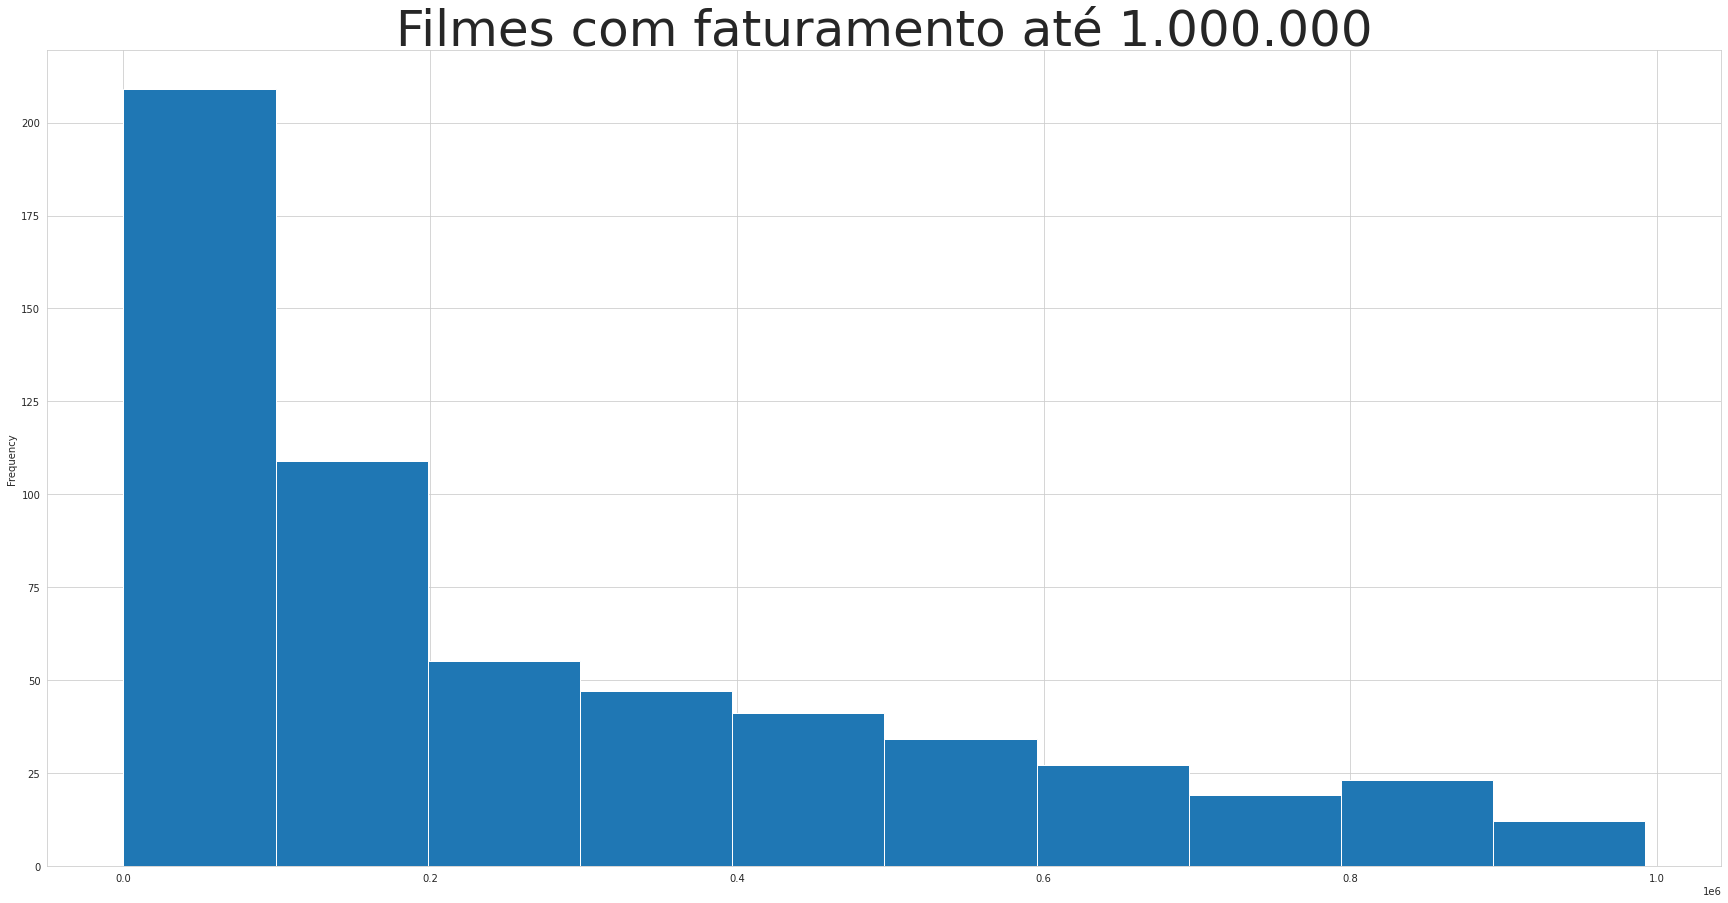

576


In [173]:
tamanho_titulo = {'fontsize': 50}
plt.figure(figsize=(30,15))
imdb.query("gross<200000000")["gross"].plot(kind='hist')
plt.title("Filmes com faturamento até 200.000.000", fontdict=tamanho_titulo)
plt.show()
print(imdb.query("gross<200000000")["gross"].count())

plt.figure(figsize=(30,15))
imdb.query("gross>10000000")["gross"].plot(kind='hist')
plt.title("Filmes com faturamento maior 10.000.000", fontdict=tamanho_titulo)
plt.show()
print(imdb.query("gross>10000000")["gross"].count())

plt.figure(figsize=(30,15))
imdb.query("gross<1000000")["gross"].plot(kind='hist')
plt.title("Filmes com faturamento até 1.000.000", fontdict=tamanho_titulo)
plt.show()
print(imdb.query("gross<1000000")["gross"].count())

 Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo **X** temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem **alto faturamento**, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

 Vamos tentar conhecer quais são esses filmes com faturamento astronômico.


In [174]:
imdb.sort_values('gross',ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,alien|character says i have a bad feeling abou...,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


Nessa lista temos **Avatar, Titanic, Jurassic World e The Avengers**, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o [`.drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)).


In [175]:
imdb = imdb.drop_duplicates()
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [176]:
imdb['color'].value_counts()

Color               4772
 Black and White     207
Name: color, dtype: int64

In [177]:
imdb["color"] = imdb["color"].str.strip()
imdb.query("color!='Color'")["color"]

4                   NaN
111     Black and White
149     Black and White
257     Black and White
272     Black and White
             ...       
5008    Black and White
5015    Black and White
5020                NaN
5022    Black and White
5028    Black and White
Name: color, Length: 226, dtype: object

In [178]:
imdb.query('color in ["Color", "Black and White"]')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [217]:
color_or_bw = imdb.query('color in ["Color", "Black and White"]')
color_or_bw['color_0_ou_1'] = (color_or_bw['color'] == "Color") * 1
color_or_bw

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,1
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,1
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,1
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,1


In [218]:
color_or_bw["color_0_ou_1"].value_counts()

1    4772
0     207
Name: color_0_ou_1, dtype: int64

In [219]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

P.S: Em aula tivemos problemas porque Black and White tinha um espaço no início, vou cortar esses detalhes aqui no notebook, mas reforço a importância de acompanhar este processo no vídeo.

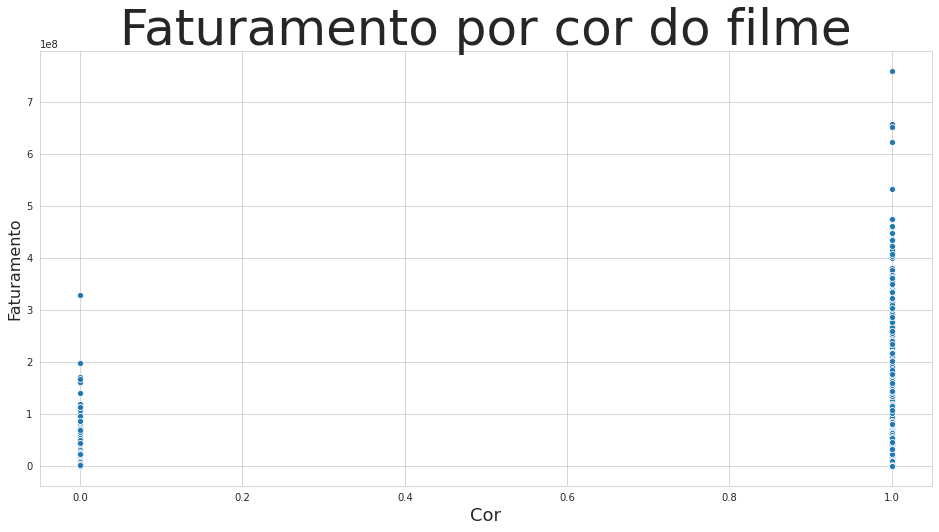

In [220]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")
plt.xlabel('Cor', fontsize=18)
plt.ylabel('Faturamento', fontsize=16)
plt.title("Faturamento por cor do filme", fontdict=tamanho_titulo)
plt.show()

Então plotamos nossos dados com um displot! Existem várias formas de visualizar essa informação, mas por ora essa nos ajuda a comparar os resultados. Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [221]:
color_or_bw.groupby("color").mean()["gross"]

color
Black and White    3.269160e+07
Color              4.887103e+07
Name: gross, dtype: float64

In [222]:
color_or_bw.groupby("color").mean()["num_critic_for_reviews"]

color
Black and White    127.512077
Color              140.797292
Name: num_critic_for_reviews, dtype: float64

In [223]:
color_or_bw.groupby("color").mean()["budget"]

color
Black and White    1.911501e+07
Color              4.074913e+07
Name: budget, dtype: float64

In [224]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
Black and White    7.220290
Color              6.408738
Name: imdb_score, dtype: float64

In [225]:
color_or_bw.groupby("color").median()["imdb_score"]

color
Black and White    7.4
Color              6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores. Há várias possíveis explicações sobre o porquê disso, reflita aí sobre algumas delas e compartilhe conosco!

##Desafio 1
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [226]:
color_or_bw.query("color_0_ou_1==0").head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
111,Black and White,Michael Bay,191.0,184.0,0.0,691.0,Jaime King,3000.0,198539855.0,Action|Drama|History|Romance|War,Jennifer Garner,Pearl Harbor,254111,5401,Mako,0.0,air raid|black smoke|japanese military|japanes...,http://www.imdb.com/title/tt0213149/?ref_=fn_t...,1999.0,English,USA,PG-13,140000000.0,2001.0,961.0,6.1,2.35,0,0
149,Black and White,Lee Tamahori,264.0,133.0,93.0,746.0,Colin Salmon,769.0,160201106.0,Action|Adventure|Thriller,Toby Stephens,Die Another Day,169914,2538,Rick Yune,0.0,catfight|clinic|colonel|diamond|patricide,http://www.imdb.com/title/tt0246460/?ref_=fn_t...,1185.0,English,UK,PG-13,142000000.0,2002.0,766.0,6.1,2.35,0,0
257,Black and White,Martin Scorsese,267.0,170.0,17000.0,827.0,Adam Scott,29000.0,102608827.0,Biography|Drama,Leonardo DiCaprio,The Aviator,264318,34582,Frances Conroy,0.0,1920s|aviation|fight|spruce goose|test flight,http://www.imdb.com/title/tt0338751/?ref_=fn_t...,799.0,English,USA,PG-13,110000000.0,2004.0,3000.0,7.5,2.35,0,0
272,Black and White,Michael Mann,174.0,165.0,0.0,780.0,Jada Pinkett Smith,10000.0,58183966.0,Biography|Drama|Sport,Will Smith,Ali,79186,14196,Joe Morton,1.0,african american protagonist|african americans...,http://www.imdb.com/title/tt0248667/?ref_=fn_t...,386.0,English,USA,R,107000000.0,2001.0,851.0,6.8,2.35,0,0
286,Black and White,Martin Campbell,400.0,144.0,258.0,834.0,Tobias Menzies,6000.0,167007184.0,Action|Adventure|Thriller,Eva Green,Casino Royale,470483,9125,Ivana Milicevic,1.0,casino|espionage|free running|james bond|terro...,http://www.imdb.com/title/tt0381061/?ref_=fn_t...,2301.0,English,UK,PG-13,150000000.0,2006.0,1000.0,8.0,2.35,0,0


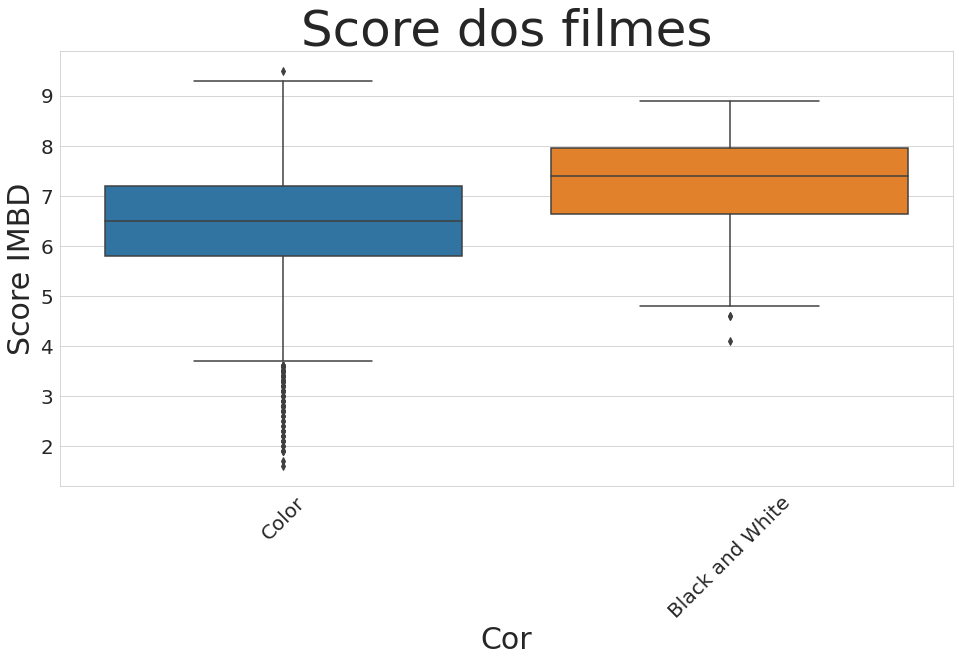

In [254]:
plt.figure(figsize=(16,8))
g = sns.boxplot(data = color_or_bw, x ="color", y="imdb_score")
g.set_xlabel("Cor", fontsize=30)
g.set_ylabel("Score IMBD", fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Score dos filmes", fontdict=tamanho_titulo)
plt.show()

A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de **gross** por **budget**:

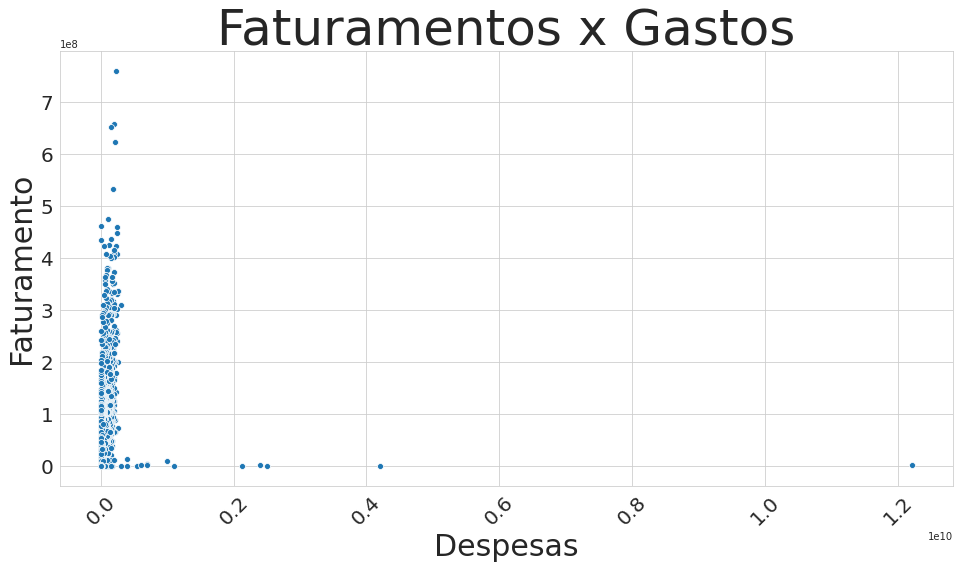

In [228]:
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

plt.figure(figsize=(16,8))
g = sns.scatterplot(x="budget", y="gross", data = budget_gross)

g.set_xlabel("Despesas", fontsize=30)
g.set_ylabel("Faturamento", fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Faturamentos x Gastos", fontdict=tamanho_titulo)
plt.show()



Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

Agora vamos analisar esse gráfico juntos, veja que a escala de **budget** mudou, agora é **e10**. Repare que apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!

In [229]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo **budget** percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. 

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [230]:
imdb['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [231]:
#por curiosidade filmes do brasil
imdb.query('country == "Brazil"')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3553,Color,José Padilha,142.0,115.0,294.0,15.0,Fernanda Machado,585.0,8060.0,Action|Crime|Drama|Thriller,Wagner Moura,Elite Squad,81644,666,André Ramiro,1.0,brazil|military police|police|rio de janeiro b...,http://www.imdb.com/title/tt0861739/?ref_=fn_t...,107.0,Portuguese,Brazil,R,4000000.0,2007.0,39.0,8.1,1.85,11000
3953,Color,Karim Aïnouz,70.0,106.0,19.0,9.0,Clemens Schick,585.0,20262.0,Drama,Wagner Moura,Futuro Beach,1738,629,Jesuíta Barbosa,2.0,gay|male frontal nudity|male nudity|male rear ...,http://www.imdb.com/title/tt2199543/?ref_=fn_t...,10.0,Portuguese,Brazil,Unrated,4000000.0,2014.0,29.0,6.1,2.35,278
3976,Color,Andrucha Waddington,42.0,115.0,6.0,24.0,Seu Jorge,119.0,NaN,Drama,Fernanda Montenegro,House of Sand,2650,222,Fernanda Torres,1.0,1910s|desert|dunes|goat|slave,http://www.imdb.com/title/tt0373747/?ref_=fn_t...,35.0,Portuguese,Brazil,R,8000000.0,2005.0,69.0,7.5,2.35,385
4029,Color,Fernando Meirelles,214.0,135.0,353.0,40.0,Seu Jorge,1000.0,7563397.0,Crime|Drama,Alice Braga,City of God,533200,1211,Alexandre Rodrigues,0.0,coming of age|male frontal nudity|male nudity|...,http://www.imdb.com/title/tt0317248/?ref_=fn_t...,749.0,Portuguese,Brazil,R,3300000.0,2002.0,69.0,8.7,1.85,28000
4131,Color,Marcio Garcia,9.0,85.0,74.0,47.0,Kristi Clainos,652.0,NaN,Action|Drama|Thriller,John Savage,Open Road,1370,844,Emily Nelson,3.0,dealer|drugs|killer|police,http://www.imdb.com/title/tt1922679/?ref_=fn_t...,9.0,English,Brazil,NaN,3000000.0,2013.0,124.0,5.5,2.35,433
4144,Color,Walter Salles,71.0,113.0,179.0,11.0,Matheus Nachtergaele,119.0,5595428.0,Drama,Fernanda Montenegro,Central Station,28951,167,Othon Bastos,0.0,brazil|letter|rio de janeiro brazil|sertao|tea...,http://www.imdb.com/title/tt0140888/?ref_=fn_t...,257.0,Portuguese,Brazil,R,2900000.0,1998.0,14.0,8.0,2.35,0
4499,Color,Anna Muylaert,111.0,112.0,9.0,4.0,Regina Casé,61.0,375723.0,Comedy|Drama,Alex Huszar,The Second Mother,7025,76,Luis Miranda,1.0,brazil|exam|housekeeper|northeast region of br...,http://www.imdb.com/title/tt3742378/?ref_=fn_t...,26.0,Portuguese,Brazil,R,4000000.0,2015.0,9.0,7.9,2.35,0
4986,Color,Bruno Barreto,1.0,99.0,9.0,3.0,Sonia Braga,866.0,NaN,Comedy|Drama|Romance,Marcello Mastroianni,Gabriela,712,1179,Joffre Soares,0.0,based on novel|brazil|female underarm hair|sex...,http://www.imdb.com/title/tt0085575/?ref_=fn_t...,9.0,Portuguese,Brazil,R,NaN,1983.0,308.0,6.4,2.35,114


In [232]:
imdb_usa = imdb.query('country == "USA"')
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [233]:
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:



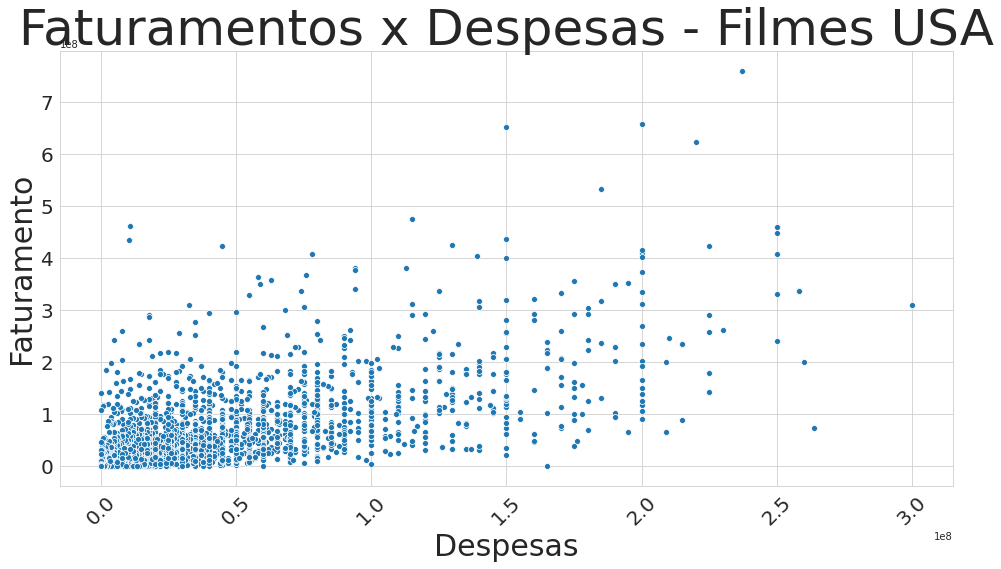

In [234]:
budget_gross= imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

plt.figure(figsize=(16,8))
g = sns.scatterplot(x="budget", y="gross", data = budget_gross)

g.set_xlabel("Despesas", fontsize=30)
g.set_ylabel("Faturamento", fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Faturamentos x Despesas - Filmes USA", fontdict=tamanho_titulo)
plt.show()

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

In [235]:
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]
imdb_usa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,NaN
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,NaN
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN


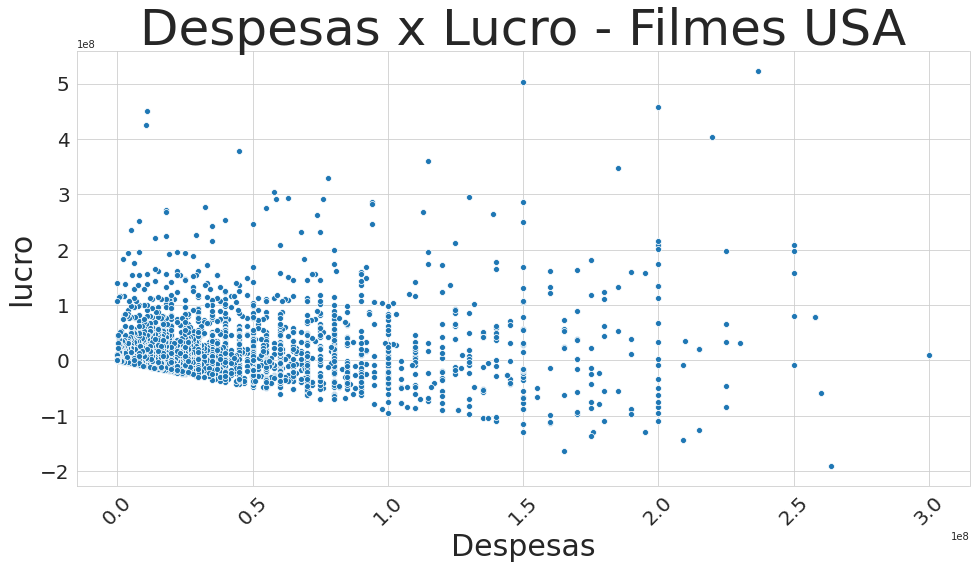

In [236]:
budget_lucro = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

plt.figure(figsize=(16,8))
g = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)

g.set_xlabel("Despesas", fontsize=30)
g.set_ylabel("lucro", fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Despesas x Lucro - Filmes USA", fontdict=tamanho_titulo)
plt.show()

MUito bom! Nós construímos nossa coluna lucro na base de dados e plotamos o orçamento contra lucro.

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade? 

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção:

In [237]:
ano_lucro = imdb_usa.query("budget >0 | gross > 0")[["movie_title", "title_year", "lucro"]].dropna()
ano_lucro = ano_lucro.sort_values("lucro")
ano_lucro.head(20)

,movie_title,title_year,lucro
5,John Carter,2012.0,-190641321.0
91,The Polar Express,2004.0,-164334574.0
28,Battleship,2012.0,-143826840.0
85,47 Ronin,2013.0,-136702695.0
49,Jack the Giant Slayer,2013.0,-129828140.0
62,Jupiter Ascending,2015.0,-128624673.0
143,Mars Needs Moms,2011.0,-128620685.0
14,The Lone Ranger,2013.0,-125710090.0
145,Pan,2015.0,-115035182.0
3879,Pan,2015.0,-115035182.0


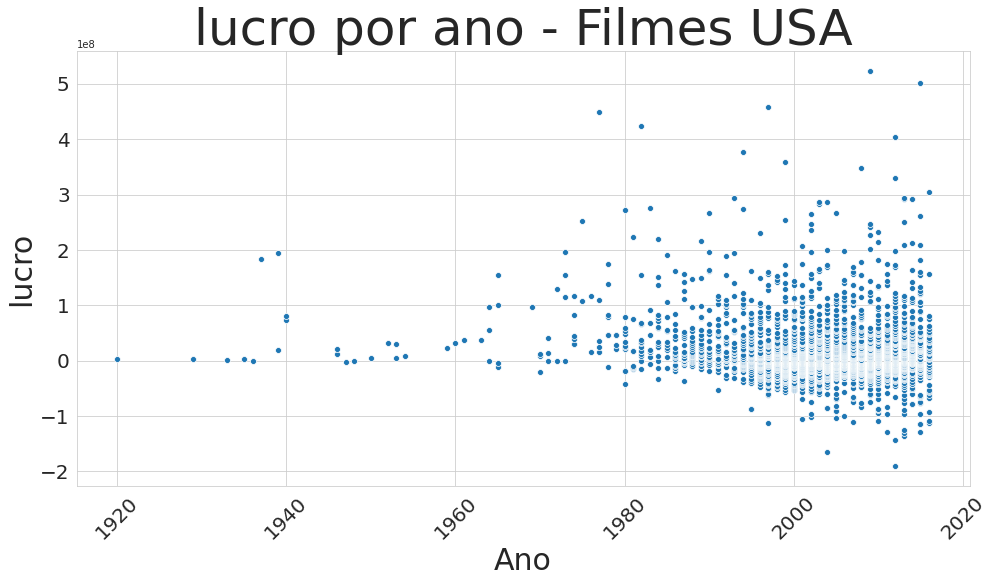

In [238]:
plt.figure(figsize=(16,8))
g = sns.scatterplot(x="title_year", y="lucro", data = ano_lucro)

g.set_xlabel("Ano", fontsize=30)
g.set_ylabel("lucro", fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("lucro por ano - Filmes USA", fontdict=tamanho_titulo)
plt.show()

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

##Desafio 2
Quem gastou tubos e teve esse prejuizão ai proximo do 2,5

In [255]:
imdb_usa.query('budget>250000000 and lucro<-100000000')
imdb_usa.sort_values("lucro")[["director_name", "movie_title", "lucro"]].head(1)


,director_name,movie_title,lucro
5,Andrew Stanton,John Carter,-190641321.0


##Desafio 3
filmes mais recentes tiveram maior prejuízo?


In [240]:
ano_prejuizo = imdb_usa.query("lucro < 0.0")[["movie_title", "title_year", "lucro"]].dropna()
ano_prejuizo.rename(columns={"lucro":"prejuizo"}, inplace=True)
ano_prejuizo = ano_prejuizo.sort_values("prejuizo").drop_duplicates()
ano_prejuizo.head(20)

,movie_title,title_year,prejuizo
5,John Carter,2012.0,-190641321.0
91,The Polar Express,2004.0,-164334574.0
28,Battleship,2012.0,-143826840.0
85,47 Ronin,2013.0,-136702695.0
49,Jack the Giant Slayer,2013.0,-129828140.0
62,Jupiter Ascending,2015.0,-128624673.0
143,Mars Needs Moms,2011.0,-128620685.0
14,The Lone Ranger,2013.0,-125710090.0
145,Pan,2015.0,-115035182.0
108,Warcraft,2016.0,-113021005.0


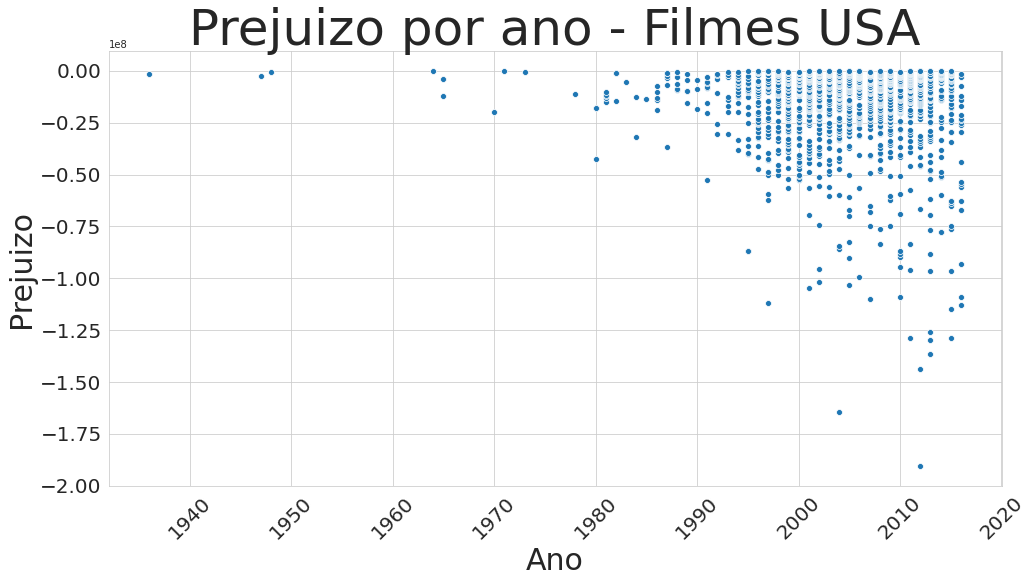

In [241]:
plt.figure(figsize=(16,8))
g = sns.scatterplot(x="title_year", y="prejuizo", data = ano_prejuizo)

g.set_xlabel("Ano", fontsize=30)
g.set_ylabel("Prejuizo", fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Prejuizo por ano - Filmes USA", fontdict=tamanho_titulo)
plt.show()

Aparentemente não tem relação os filmes com lucro/prejuizo estão bem distribuidos nos anos

##Desafio 4
Quem são os filmes pré 2ª guerra que ganharam tanto

In [242]:
imdb_usa.query("title_year>=1930 and title_year<=1945").sort_values('lucro',ascending=False)[['movie_title', "title_year", "lucro"]].head(2)

,movie_title,title_year,lucro
3970,Gone with the Wind,1939.0,194678278.0
4449,Snow White and the Seven Dwarfs,1937.0,182925485.0


Falando em Paulo, ele sugeriu uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [243]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
filmes_por_diretor

Steven Spielberg            24
Martin Scorsese             20
Clint Eastwood              20
Woody Allen                 18
Tim Burton                  16
                            ..
Neal Brennan                 1
Henry Alex Rubin             1
Bill Benenson                1
Daryl Wein                   1
Daisy von Scherler Mayer     1
Name: director_name, Length: 1812, dtype: int64

In [244]:
imdb_usa[["director_name", "gross"]].set_index("director_name")

,gross
director_name,
James Cameron,760505847.0
Gore Verbinski,309404152.0
Christopher Nolan,448130642.0
Andrew Stanton,73058679.0
Sam Raimi,336530303.0
...,...
Edward Burns,4584.0
NaN,NaN
Benjamin Roberds,NaN


In [245]:
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


In [246]:
gross_director

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0
...,...,...,...
3768,Edward Burns,4584.0,4.0
3769,NaN,NaN,NaN
3770,Benjamin Roberds,NaN,1.0
3771,Daniel Hsia,10443.0,1.0


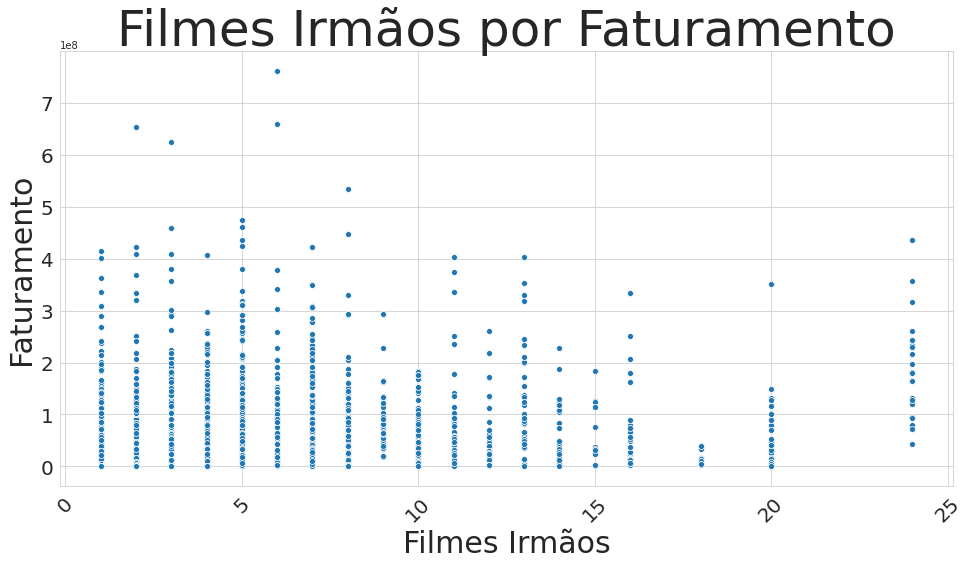

In [247]:
plt.figure(figsize=(16,8))
g = sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

g.set_xlabel("Filmes Irmãos", fontsize=30)
g.set_ylabel("Faturamento", fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Filmes Irmãos por Faturamento", fontdict=tamanho_titulo)
plt.show()


Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.

##Desafio 5
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [248]:
gross_director.query("filmes_irmaos > 16 and filmes_irmaos < 20")[["director_name","filmes_irmaos"]].drop_duplicates()

,director_name,filmes_irmaos
1538,Woody Allen,18.0


Para finalizar, que tal realizar uma análise das correlações dos dados? EXistem várias formas de calcular a correlação, esse é um assunto denso.Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Vamos então inciar a análise das correlações plotando o pairplot.

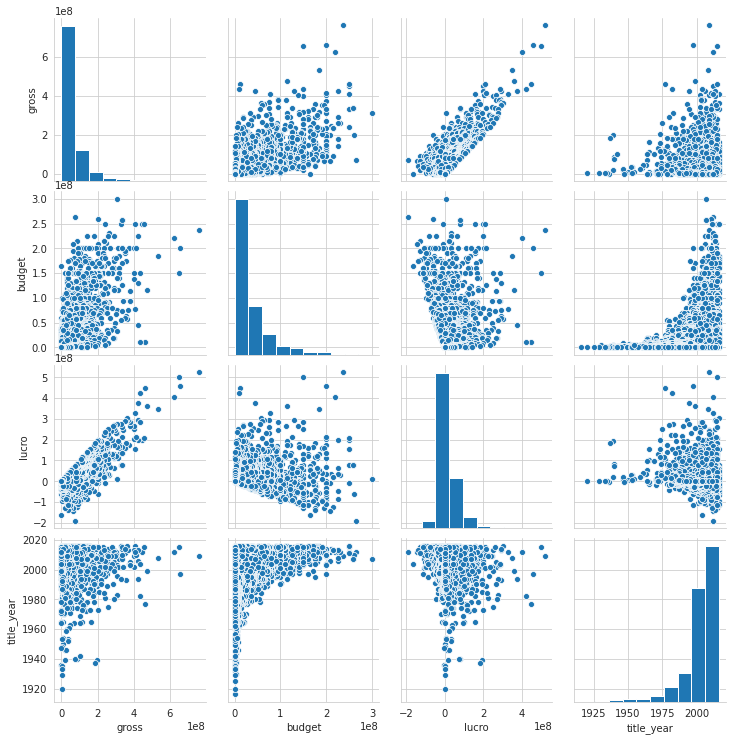

In [249]:

g = sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

plt.show()

O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do `.corr()` do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [250]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados. Vamos fazer isso?

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra. 

Agora sim, entendido sobre a correlação vamos analisar as nossas. Veja que lucro e gross tem uma correlação alta, o que indica que quanto maior o orçamento maior o lucro (mas repare que a correlação não é perfeita), já o title_yers e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação). Viu como conseguimos analisar muitas coisas com a correlação?! Pense e tente analisar os outros casos também.


Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando, cada vez mais legal e ao mesmo tempo mais complexo né?

O que importa é estar iniciando e entendendo o que fazemos para analisar os dados! **Continue até o fim, garanto que vai valer a pena.**
Vamos praticar?

**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!

**P.S: A partir de agora teremos muitos desafios envolvendo mais análises e conclusões, então não haverá um "gabarito". O importante é você compartilhar suas soluções com os colegas e debater os seus resultados e das outras pessoas**

##Desafio 6
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos. Mudar marcadores.

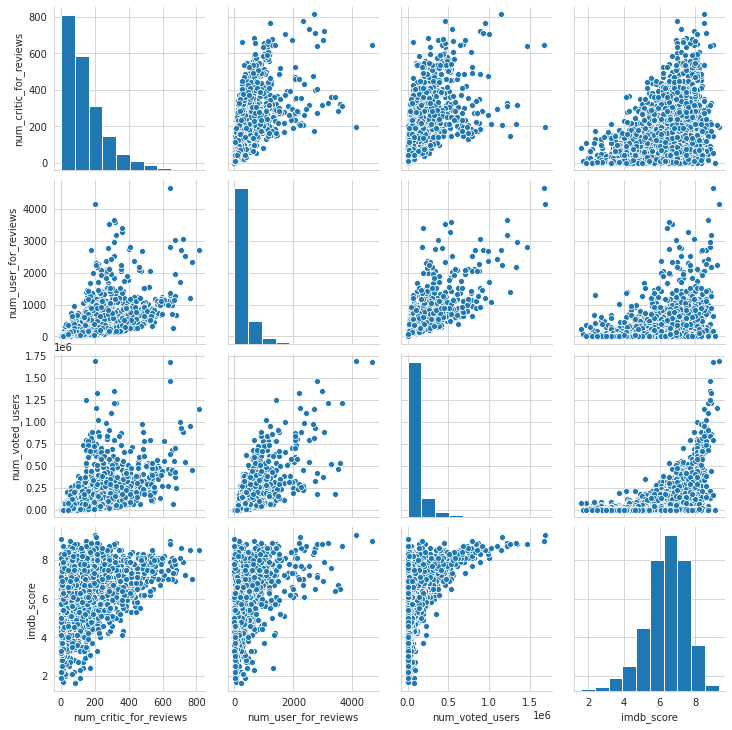

,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score
num_critic_for_reviews,1.000000,0.611119,0.621889,0.320960
num_user_for_reviews,0.611119,1.000000,0.797354,0.320336
num_voted_users,0.621889,0.797354,1.000000,0.447340
imdb_score,0.320960,0.320336,0.447340,1.000000


In [257]:
sns.pairplot(data = imdb_usa[["num_critic_for_reviews", "num_user_for_reviews", "num_voted_users", "imdb_score"]])
plt.show()
imdb_usa[["num_critic_for_reviews", "num_user_for_reviews", "num_voted_users", "imdb_score"]].corr()

Aqui deu pra perceber que quanto maior o score do filme são maiores as quantidades gerais de reviews (tanto num_critic_for_reviews quanto num_user_for_reviews) e votos (num_voted_users). Tendo assim uma percepição de que a tendencia é que mais pessoas que estão gostando dos filmes vão dar um review do mesmo, aparentemente quando não gosta muito a chance de a pessoa chegar a avaliar é menor.

In [258]:
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


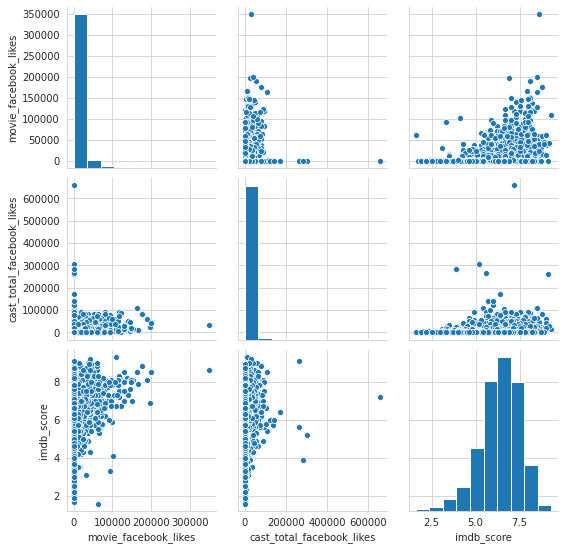

,movie_facebook_likes,cast_total_facebook_likes,imdb_score
movie_facebook_likes,1.000000,0.200646,0.262614
cast_total_facebook_likes,0.200646,1.000000,0.111231
imdb_score,0.262614,0.111231,1.000000


In [260]:
sns.pairplot(data = imdb_usa[["movie_facebook_likes", "cast_total_facebook_likes", "imdb_score"]])
plt.show()
imdb_usa[["movie_facebook_likes", "cast_total_facebook_likes", "imdb_score"]].corr()

##Desafio 7
Calcular a correlação somente para filmes depois do ano 2000(jogar fora os de antes de 2000) e interpretar essa correlação

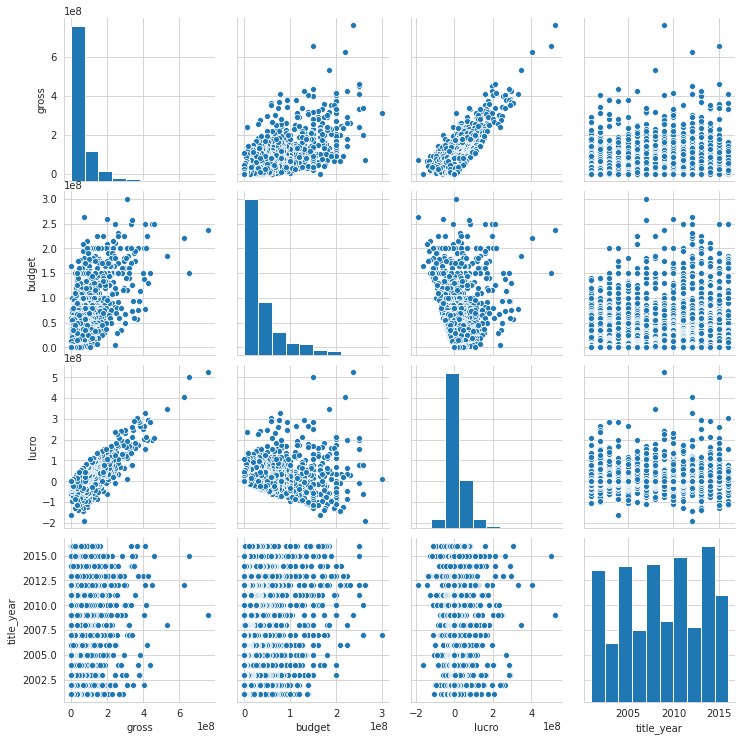

,gross,budget,lucro,title_year
gross,1.000000,0.708622,0.770074,0.102319
budget,0.708622,1.000000,0.095558,0.059220
lucro,0.770074,0.095558,1.000000,0.028288
title_year,0.102319,0.059220,0.028288,1.000000


In [263]:
imdb_usa_a_partir_2000 =  imdb_usa.query("title_year>2000")
sns.pairplot(data = imdb_usa_a_partir_2000[["gross", "budget", "lucro", "title_year"]])
plt.show()
imdb_usa_a_partir_2000[["gross", "budget", "lucro", "title_year"]].corr()

In [262]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


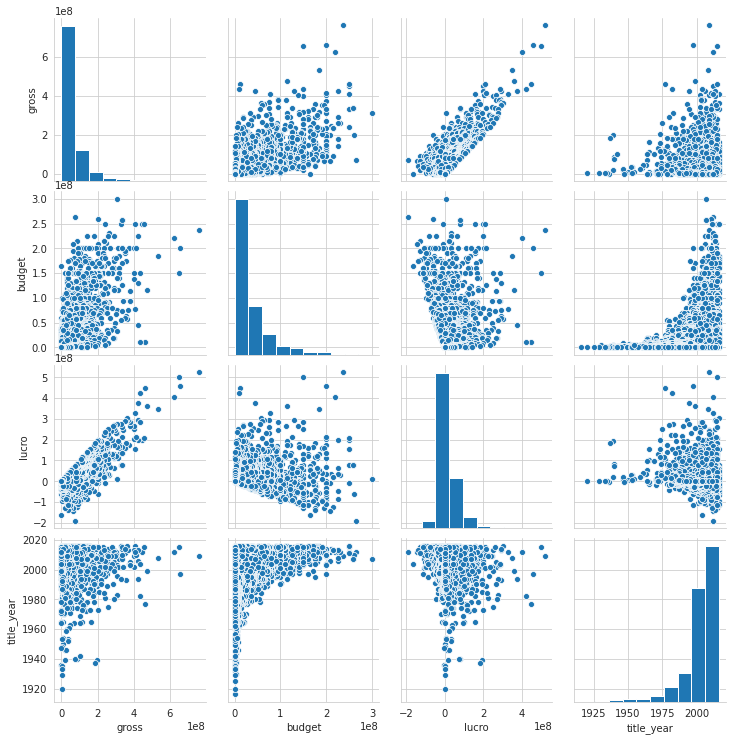

In [265]:
g = sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

plt.show()

##Desafio 8
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

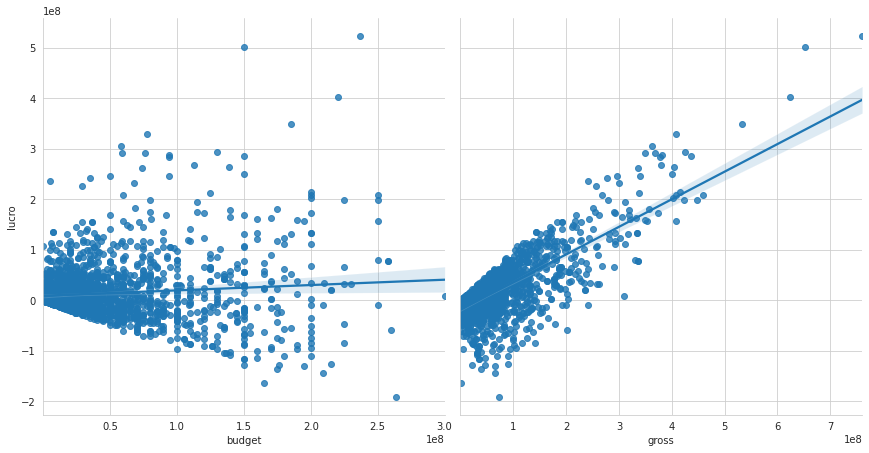

In [271]:
g = sns.pairplot(data = imdb_usa_a_partir_2000, y_vars='lucro', x_vars = ["budget","gross"],  height=6, kind="reg")

plt.show()

##Desafio 9
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

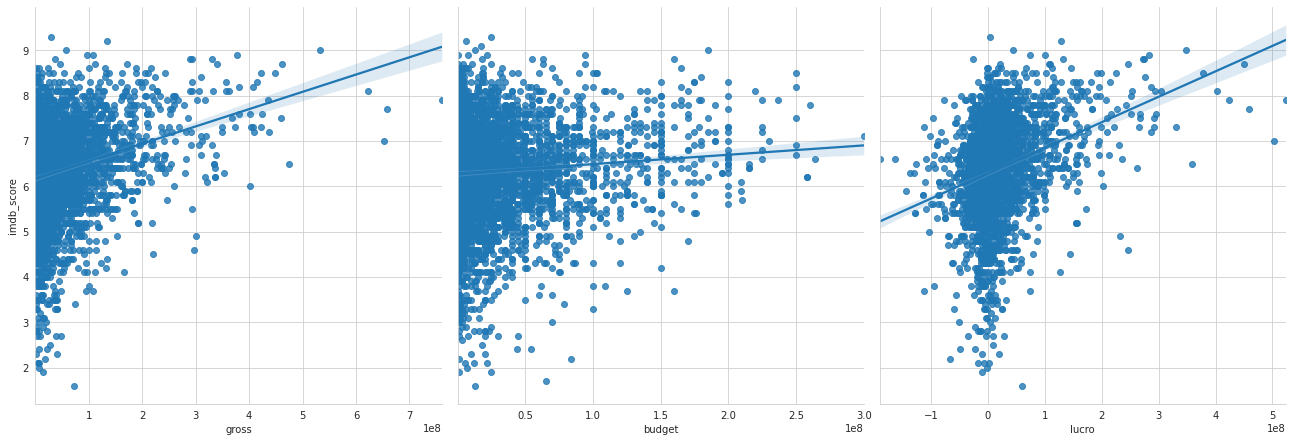

,gross,budget,lucro,imdb_score
gross,1.000000,0.645673,0.797037,0.258948
budget,0.645673,1.000000,0.053455,0.078936
lucro,0.797037,0.053455,1.000000,0.294858
imdb_score,0.258948,0.078936,0.294858,1.000000


In [339]:
sns.pairplot(data = imdb_usa, y_vars="imdb_score", x_vars=["gross", "budget", "lucro", ], height=6, kind="reg")
plt.show()
imdb_usa[["gross", "budget", "lucro", "imdb_score"]].corr()

In [360]:
avaliacoes_ano = imdb_usa.groupby('title_year').count()['num_user_for_reviews']
avaliacoes_ano = avaliacoes_ano.reset_index()
avaliacoes_ano

,title_year,num_user_for_reviews
0,1916.0,1
1,1920.0,1
2,1925.0,1
3,1929.0,1
4,1930.0,1
...,...,...
85,2012.0,170
86,2013.0,170
87,2014.0,181
88,2015.0,164


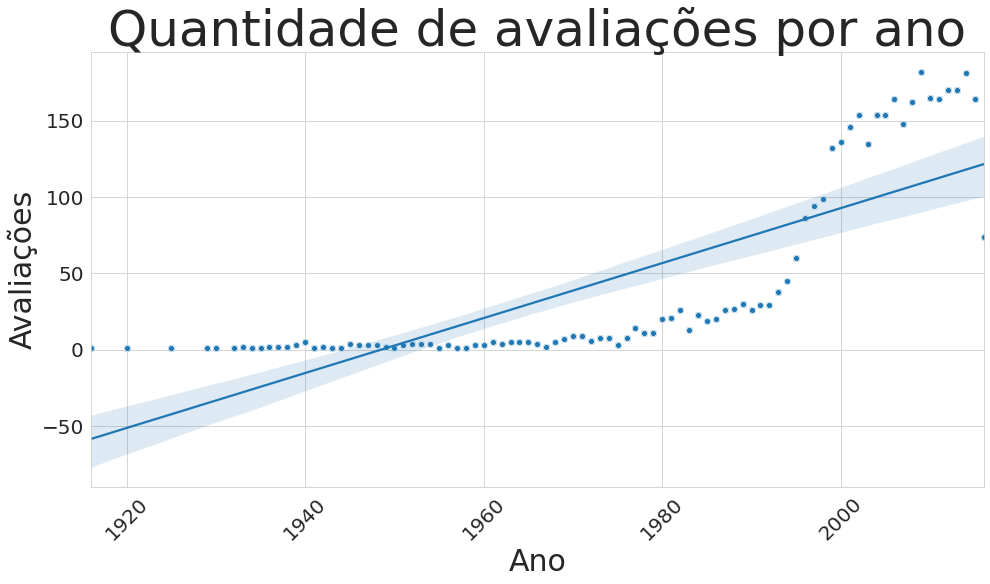

,title_year,num_user_for_reviews
title_year,1.000000,0.020008
num_user_for_reviews,0.020008,1.000000


In [361]:
plt.figure(figsize=(16,8))
sns.regplot(x='title_year', y='num_user_for_reviews', data = avaliacoes_ano)

g = sns.scatterplot(x='title_year', y='num_user_for_reviews', data = avaliacoes_ano)
g.set_xlabel("Ano", fontsize=30)
g.set_ylabel("Avaliações", fontsize=30)

plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Quantidade de avaliações por ano", fontdict=tamanho_titulo)

plt.show()
imdb_usa[["title_year", "num_user_for_reviews"]].corr()


In [272]:
imdb_usa.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'lucro'],
      dtype='object')